In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import statistics as st
import seaborn as sns
import scipy as sc
import math
from scipy.stats import norm

In [2]:
df=pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

In [3]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
5,1849-06-01,24.844,1.402,Abidjan,Côte D'Ivoire,5.63N,3.23W
6,1849-07-01,24.058,1.254,Abidjan,Côte D'Ivoire,5.63N,3.23W
7,1849-08-01,23.576,1.265,Abidjan,Côte D'Ivoire,5.63N,3.23W
8,1849-09-01,23.662,1.226,Abidjan,Côte D'Ivoire,5.63N,3.23W
9,1849-10-01,25.263,1.175,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [4]:
df['AverageTemperature'].isnull().value_counts()

False    228175
True      11002
Name: AverageTemperature, dtype: int64

In [5]:
df['AverageTemperatureUncertainty'].isnull().value_counts()

False    228175
True      11002
Name: AverageTemperatureUncertainty, dtype: int64

In [6]:
df[19945:19949]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
19945,2013-07-01,25.008,0.416,Bangalore,India,12.05N,77.26E
19946,2013-08-01,25.236,0.520,Bangalore,India,12.05N,77.26E
19947,2013-09-01,NaN,NaN,Bangalore,India,12.05N,77.26E
19948,1816-03-01,27.426,1.793,Bangkok,Thailand,13.66N,99.91E


In [7]:
list=df.City.unique()

In [8]:
#Here we clear the Nan values in our data based on city wise analysis.
for i in list:
    df.loc[df['City']==i]=df.loc[df['City']==i].interpolate()

In [9]:
df[19945:19949]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
19945,2013-07-01,25.008,0.416,Bangalore,India,12.05N,77.26E
19946,2013-08-01,25.236,0.520,Bangalore,India,12.05N,77.26E
19947,2013-09-01,25.236,0.520,Bangalore,India,12.05N,77.26E
19948,1816-03-01,27.426,1.793,Bangkok,Thailand,13.66N,99.91E


In [10]:
df['AverageTemperatureUncertainty'].isnull().value_counts()

False    239177
Name: AverageTemperatureUncertainty, dtype: int64

In [11]:
df['AverageTemperature'].isnull().value_counts()

False    239177
Name: AverageTemperature, dtype: int64

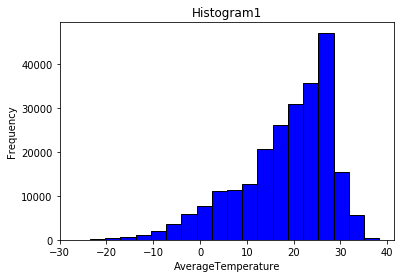

In [12]:
# a negatively skewed histogram is obtained on Average Temperature data.
plt.hist(df['AverageTemperature'], color = 'blue', edgecolor = 'black',
         bins = 20)
plt.xlabel('AverageTemperature')
plt.ylabel('Frequency')
plt.title('Histogram1')
plt.show()

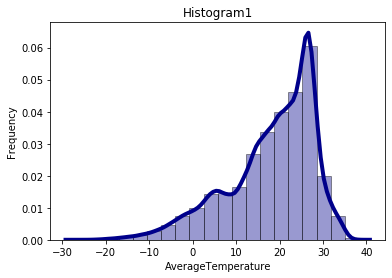

In [13]:
# a negatively skewed histogram is obtained on Average Temperature data with line fit.
sns.distplot(df['AverageTemperature'], hist=True, kde=True, bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.xlabel('AverageTemperature')
plt.ylabel('Frequency')
plt.title('Histogram1')
plt.show()

In [14]:
#Population parameters and statistics using inbuilt libraries.
print("Mean:",st.mean(df['AverageTemperature']))
print("Median:",st.median(df['AverageTemperature']))
print("Mode:",st.mode(df['AverageTemperature']))
print("Standard deviation pop:",st.pstdev(df['AverageTemperature']))
print("S D:",st.stdev(df['AverageTemperature']))

Mean: 18.172452967885707
Median: 20.479
Mode: 26.612
Standard deviation pop: 9.951819045569652
S D: 9.951839849932638


In [15]:
#Parameters using the histogram.
print("1.Based on Histogram we can analise that the parameters are matching with what is computed using inbuilt libraries.")
print("2.As positively skewed mean < median < mode")
print("2.We can infer that there are few places with negative temperatures. We can find few such cities.")
print("3.But we can infer that majority of cities have positive temperatures from yhe graph.")
print("4.The graph is negatively skewed.")

1.Based on Histogram we can analise that the parameters are matching with what is computed using inbuilt libraries.
2.As positively skewed mean < median < mode
2.We can infer that there are few places with negative temperatures. We can find few such cities.
3.But we can infer that majority of cities have positive temperatures from yhe graph.
4.The graph is negatively skewed.


In [16]:
#We find the number of cities and their names whose average temperature is equal to 0.
ds=df.loc[df['AverageTemperature']<0]
n_city=set(ds.City)
print(n_city)
print("Number of cities:",len(n_city))

{'Harbin', 'New York', 'Tokyo', 'Moscow', 'Mashhad', 'Shenyang', 'London', 'Saint Petersburg', 'Santiago', 'Madrid', 'Jinan', 'Nanjing', 'Chengdu', 'Rome', 'Changchun', 'Chicago', 'Istanbul', 'Peking', 'Taiyuan', 'Dalian', 'Kabul', 'Berlin', 'Shanghai', 'Ankara', 'Toronto', 'Xian', 'Montreal', 'Tangshan', 'Paris', 'Tianjin', 'Kiev', 'Wuhan', 'Seoul'}
Number of cities: 33


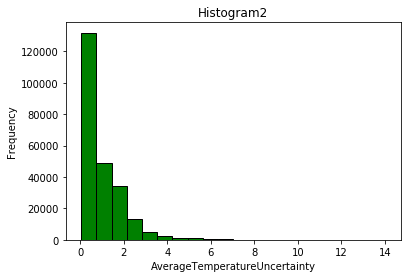

In [17]:
plt.hist(df['AverageTemperatureUncertainty'], color = 'green', edgecolor = 'black',
         bins = 20)
plt.xlabel('AverageTemperatureUncertainty')
plt.ylabel('Frequency')
plt.title('Histogram2')
plt.show()

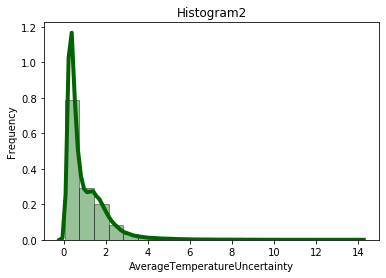

In [18]:
#Positively skewed graph for the uncertainity
sns.distplot(df['AverageTemperatureUncertainty'], hist=True, kde=True, bins=20, color = 'darkgreen', 
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.xlabel('AverageTemperatureUncertainty')
plt.ylabel('Frequency')
plt.title('Histogram2')
plt.show()

In [19]:
#Population parameters and statistics using inbuilt libraries.
print("Mean:",st.mean(df['AverageTemperatureUncertainty']))
print("Median:",st.median(df['AverageTemperatureUncertainty']))
print("Mode:",st.mode(df['AverageTemperatureUncertainty']))
print("Standard deviation pop:",st.pstdev(df['AverageTemperatureUncertainty']))
print("S D:",st.stdev(df['AverageTemperatureUncertainty']))

Mean: 1.0088659925494508
Median: 0.631
Mode: 0.256
Standard deviation pop: 0.9821093564750616
S D: 0.9821114095830865


In [20]:
#Inferences ,ade on the graph
print("1.The graph is highly positively skewed.")
print("2.As positively skewed mean > median > mode")
print("3.The graph may contain few outliers.")
print("4.This is unimodal with peak at the starting")

1.The graph is highly positively skewed.
2.As positively skewed mean > median > mode
3.The graph may contain few outliers.
4.This is unimodal with peak at the starting


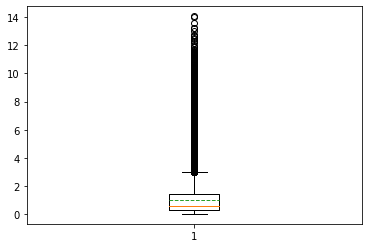

In [21]:
#Box plot is to identify the outliers
#hence we suspect the outliers in case of AverageTemperatureUncertainty
plt.boxplot(df['AverageTemperatureUncertainty'], meanline=True, showmeans=True, vert=True)   #to show the mean of the datapoints
plt.show()


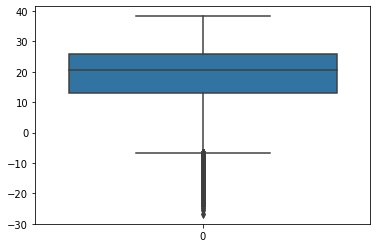

In [22]:
#Box plot is to identify the outliers
#hence we suspect the outliers in case of AverageTemperature
sns.boxplot(data=df['AverageTemperature'])

In [23]:
#Hence we need to remove the outliers and then use the data
#for that we need to compute Inter-Quartile Range(IQR)
print("For Average Temperature:")
IQR=sc.stats.iqr(df['AverageTemperature'])
print(IQR)
Q1=np.quantile(df['AverageTemperature'],0.25)
Q2=np.quantile(df['AverageTemperature'],0.5)
Q3=np.quantile(df['AverageTemperature'],0.75)
IQR1=Q3-Q1
print(Q1, Q2, Q3)
print(IQR1)
print()
print()
#Same is done for Average Temperature Uncertainity
print("For Average Temperature:")
IQRU=sc.stats.iqr(df['AverageTemperatureUncertainty'])
print(IQRU)
QU1=np.quantile(df['AverageTemperatureUncertainty'],0.25)
QU2=np.quantile(df['AverageTemperatureUncertainty'],0.5)
QU3=np.quantile(df['AverageTemperatureUncertainty'],0.75)
IQRU1=QU3-QU1
print(QU1, QU2, QU3)
print(IQRU1)

For Average Temperature:
13.043
12.866 20.479 25.909
13.043


For Average Temperature:
1.073
0.349 0.631 1.422
1.073


In [24]:
#Eliminate all outliers based on formulae
print("For Average Temperature:")
O=Q3+1.5*IQR
O1=Q1-1.5*IQR
print(O,O1)
print()
print()
print("For Average Temperature Uncertainity:")
OU=QU3+1.5*IQRU
OU1=QU1-1.5*IQRU
print(OU,OU1)

For Average Temperature:
45.4735 -6.698499999999999


For Average Temperature Uncertainity:
3.0315 -1.2605


In [25]:
df.loc[df['AverageTemperature']>45.4735]
#hence eliminate only the lower bound of it
#Same is for Average Temperature Uncertainity which has upper bound

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude


In [26]:
#we need to drop all these values 
#df.loc[df['AverageTemperatureUncertainty']>3.0315]
#df.loc[df['AverageTemperature']<-6.6985]
#So we can use
df=df.loc[df['AverageTemperatureUncertainty']<=3.0315]
df=df.loc[df['AverageTemperature']>=-6.6985]
print(df.count())

dt                               225978
AverageTemperature               225978
AverageTemperatureUncertainty    225978
City                             225978
Country                          225978
Latitude                         225978
Longitude                        225978
dtype: int64


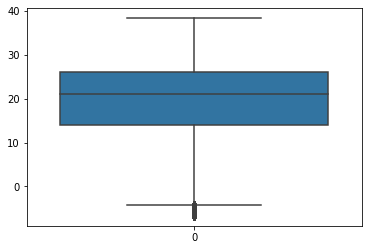

In [27]:
#Now we plot the graph to check if outliers are removed(Only the required range of them are present)
sns.boxplot(data=df['AverageTemperature'])

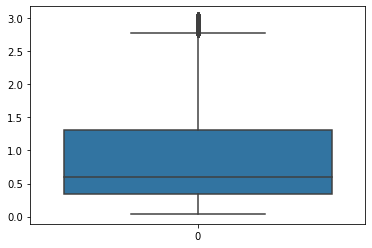

In [28]:
#Now we plot the graph to check if outliers are removed(Only the required range of them are present)
sns.boxplot(data=df['AverageTemperatureUncertainty'])

In [29]:
India_city=set(df.loc[df['Country']=='India'].City)
print(India_city)
India_df=df.loc[df['Country']=='India']

{'Hyderabad', 'Bangalore', 'Madras', 'Nagpur', 'Bombay', 'Pune', 'Delhi', 'Kanpur', 'Ahmadabad', 'Surat', 'Jaipur', 'New Delhi', 'Lakhnau', 'Calcutta'}


In [30]:
#I restrict my population for now to Indian Cities
city_temp={}
av_temp_days=[]
lat=[]
for i in India_city:
    city_temp[i]=np.mean(India_df.loc[India_df['City']==i].AverageTemperature)
    av_temp_days.append(np.mean(India_df.loc[India_df['City']==i].AverageTemperature))

In [31]:
# Dictionary containing the average temperature of cities across all the days
city_temp

{'Hyderabad': 26.83381731351175,
 'Bangalore': 24.855663020758016,
 'Madras': 28.423769220475076,
 'Nagpur': 25.520765364423976,
 'Bombay': 26.57689002064929,
 'Pune': 24.574179136478694,
 'Delhi': 24.366728407033875,
 'Kanpur': 24.47810144080997,
 'Ahmadabad': 26.350090668217653,
 'Surat': 26.176486705577172,
 'Jaipur': 24.72515211486224,
 'New Delhi': 24.366728407033875,
 'Lakhnau': 24.47810144080997,
 'Calcutta': 25.9120688548218}

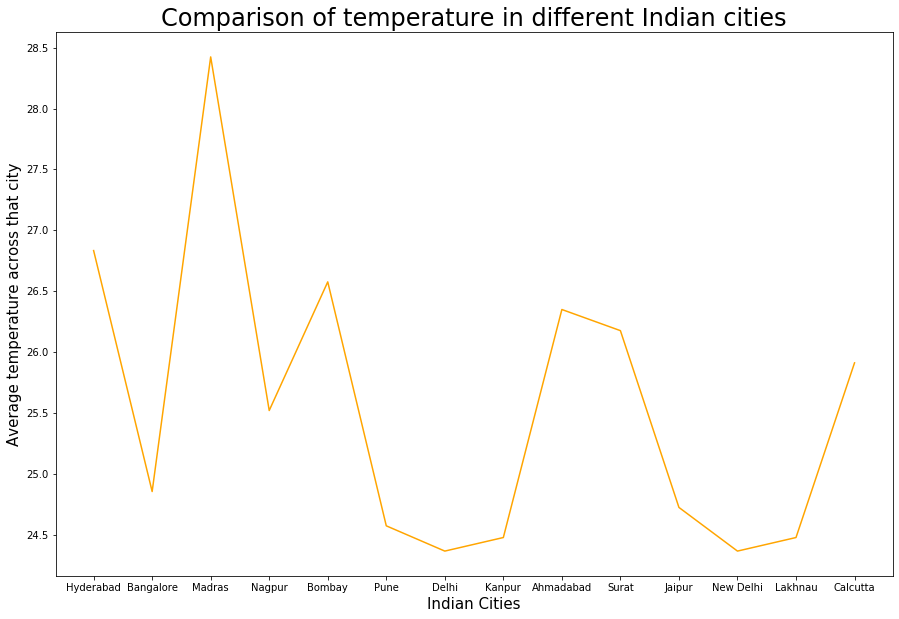

In [32]:
#Line plot to infer about the average temperature across different cities in India.
plt.figure(figsize=(15,10))
plt.plot([*India_city,], av_temp_days, color='orange')
plt.xlabel('Indian Cities',fontsize=15)
plt.ylabel('Average temperature across that city',fontsize=15)
plt.title('Comparison of temperature in different Indian cities',fontsize=24)
plt.show()

In [33]:
#Inferences are:(it can be taken as correlation between the graphs)
#1.Madras city has the highest temperature when compared to all other cities.
#2.New Delhi and Delhi are cities which have less average as they might have more variation in temperature.
#3.Lakhnau is place where the temperature is normally less hence rhe average temperature is less.

In [34]:
# we will use Chicago city as population for Hypothesis testing
Chic_df=df.loc[df['City']=='Chicago']
Chic_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
51674,1743-11-01,5.436000,2.205000,Chicago,United States,42.59N,87.27W
51675,1743-12-01,6.102000,2.235400,Chicago,United States,42.59N,87.27W
51676,1744-01-01,6.768000,2.265800,Chicago,United States,42.59N,87.27W
51677,1744-02-01,7.434000,2.296200,Chicago,United States,42.59N,87.27W
51678,1744-03-01,8.100000,2.326600,Chicago,United States,42.59N,87.27W
51679,1744-04-01,8.766000,2.357000,Chicago,United States,42.59N,87.27W
51680,1744-05-01,11.605000,2.102000,Chicago,United States,42.59N,87.27W
51681,1744-06-01,17.965000,1.989000,Chicago,United States,42.59N,87.27W
51682,1744-07-01,21.680000,1.786000,Chicago,United States,42.59N,87.27W
51683,1744-08-01,19.355000,1.856500,Chicago,United States,42.59N,87.27W


In [35]:
#we take Chicago city as the population and then further continue with hypothesis testing.
# Iniltially we normalise a sample taken from Chicago.

In [36]:
mu=st.mean(Chic_df['AverageTemperature'])
sigma=st.stdev(Chic_df['AverageTemperature'])
print(mu,sigma)

10.428115246999077 8.252172823694936


In [37]:
#sample from chicago
from random import sample
n=100
s=sample([*Chic_df['AverageTemperature'],],n)
xbar=st.mean(s)
sd=st.stdev(s)
print(mu,sd)

10.428115246999077 8.644717416298082


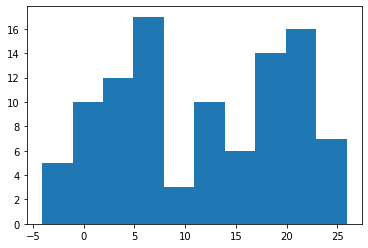

In [38]:
#plot the sample
plt.hist(s)
plt.show()

In [39]:
#This normal distribotion can be normalised by making mean 0 and standard deviation 1
#array is the population
array=[*Chic_df['AverageTemperature'],]
#Sampling distribution taking many sample means into considerations
mu=st.mean(array)
sigma=st.stdev(array)
def normalise(arr, n, number_of_samples):
    normal=[]
    x=[]
    sd=sigma/math.sqrt(n)
    for i in range(0,number_of_samples):
        s=sample(array,n)
        xbar=st.mean(s)
        x.append(xbar)
        l=(xbar-mu)/sd
        normal.append(l)
    plt.hist(x, color='blue', edgecolor='black')
    plt.xlabel("Sample Means")
    plt.ylabel("Frequency")
    plt.title("Sampling Distribution of Mean")
    plt.show()
    
    plt.hist(normal, color='green', edgecolor='black')
    plt.xlabel("Sample Means")
    plt.ylabel("Frequency")
    plt.title("Normalised Sampling Distribution of Mean")
    plt.show()
    
    sns.distplot(x, hist=True, kde=True, bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
    
    sns.distplot(normal, hist=True, kde=True, bins=10, color = 'darkgreen', 
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
    

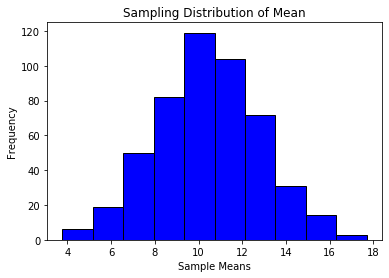

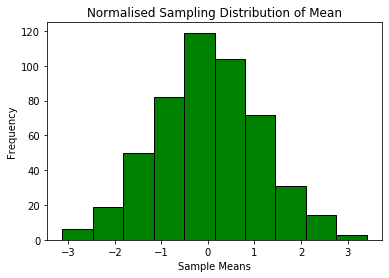

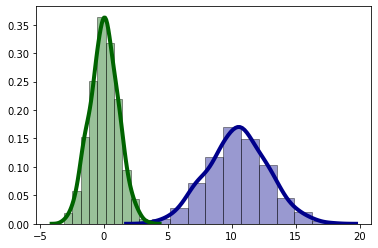

In [40]:
#With n<30 (t distribution is seen)
normalise(array, 15, 500)

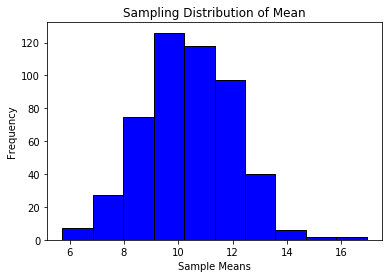

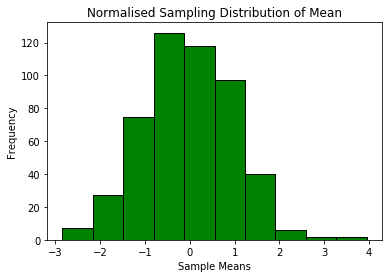

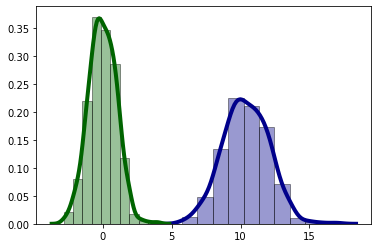

In [41]:
normalise(array , 25, 500)

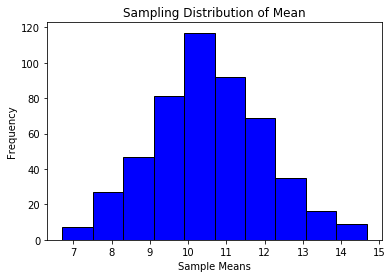

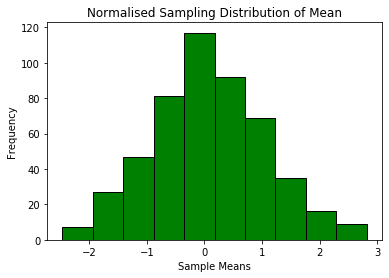

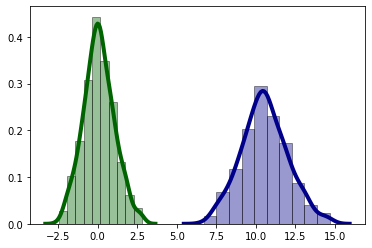

In [42]:
#with n=30 approximate z distribution can be obtained
normalise(array, 30, 500)

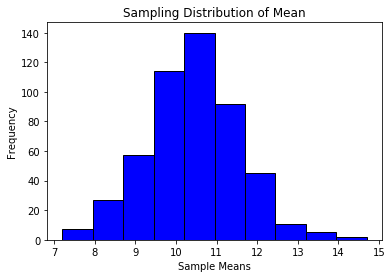

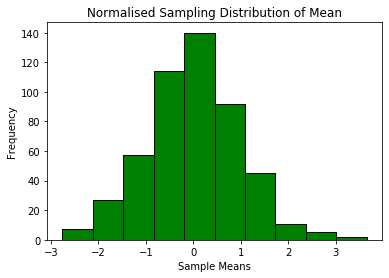

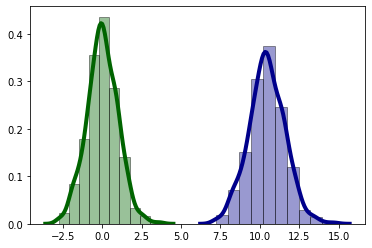

In [43]:
#with n>30 normal distribution can be perfectly obtained
normalise(array, 50, 500)

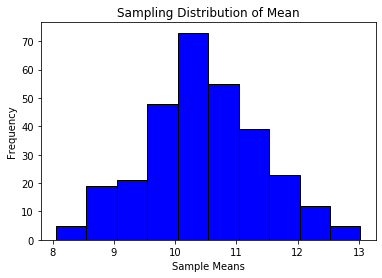

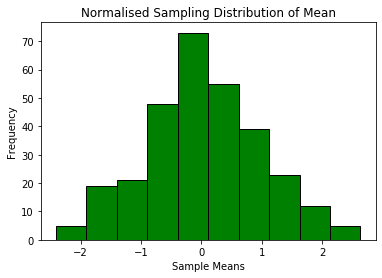

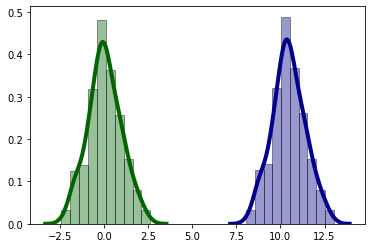

In [44]:
normalise(array, 70, 300)

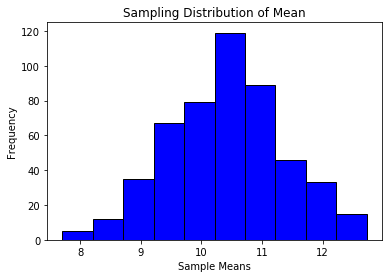

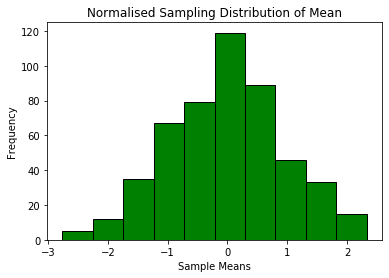

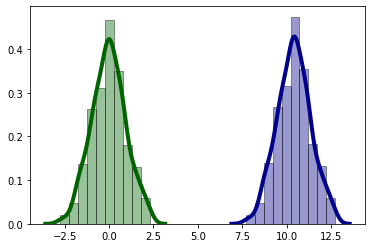

In [45]:
normalise(array, 70, 500)

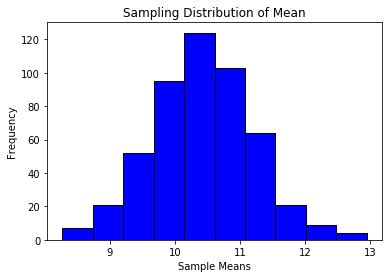

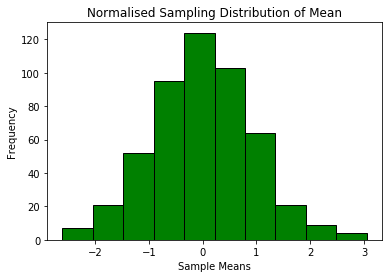

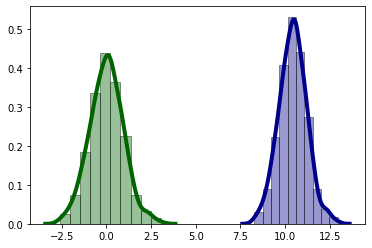

In [46]:
normalise(array, 100, 500)

In [47]:
# we 70 samples into consideration and do hypothesis testing.
#given that mu and sigma of population Chicago is:
print(mu,sigma)

10.428115246999077 8.252172823694936


In [48]:
#Generalise hypothesis testing for upper tailtest:(n>30)
def upper_tail_HT(m, xbar, n, alpha):
    #Z-score of xbar
    sd=sigma/math.sqrt(n)
    z=(xbar-m)/sd
    #Area towards right of it
    area=1-norm.cdf(z)
    if(area > alpha):
        print("Fail to reject the Null hypothesis or Reject the alternate hypothesis.")
    else:
        print("Reject the NUll hypothesis or Fail to reject Alternate Hypothesis")

In [82]:
#we define aur query as:
#Only if the mean is greater than 9 we consider it else we reject it.
print("Null Hypothesis(Ho):m0 <= 9")
print("Alternate Hypothesis(Ha):m0 > 9")
n=70
#we check for 95% and 90% condfidence intervals.
s=sample(array, n)
xbar=st.mean(s)
print(xbar)
upper_tail_HT(9, xbar, n, 0.05)
upper_tail_HT(9 ,xbar, n, 0.1)

Null Hypothesis(Ho):m0 <= 9
Alternate Hypothesis(Ha):m0 > 9
10.603347368421053
Fail to reject the Null hypothesis or Reject the alternate hypothesis.
Reject the NUll hypothesis or Fail to reject Alternate Hypothesis


In [89]:
#For n=50
s=sample(array, 50)
xbar=st.mean(s)
print(xbar)
upper_tail_HT(9, xbar , 50, 0.05)
upper_tail_HT(9, xbar , 50, 0.1)
#For n=100
s=sample(array, 100)
xbar=st.mean(s)
print(xbar)
upper_tail_HT(9, xbar , 100, 0.05)
upper_tail_HT(9, xbar , 100, 0.1)

9.889598947368421
Fail to reject the Null hypothesis or Reject the alternate hypothesis.
Fail to reject the Null hypothesis or Reject the alternate hypothesis.
10.170432105263158
Fail to reject the Null hypothesis or Reject the alternate hypothesis.
Reject the NUll hypothesis or Fail to reject Alternate Hypothesis


In [94]:
#Hypothesis Testing for lower tail test with n<30 (as sigma is known we use z table instead of t table) 
def lower_tail_HT(m, xbar, n, alpha):
    #z-score of xbar
    sd=sigma/math.sqrt(n)
    z=(xbar-m)/sd
    #Area towards right of it
    area=norm.cdf(z)
    if(area > alpha):
        print("Fail to reject the Null hypothesis or Reject the alternate hypothesis.")
    else:
        print("Reject the NUll hypothesis or Fail to reject Alternate Hypothesis")

In [99]:
#we define aur query as:
#Only if the mean is less than 12 we consider it else we reject it.
print("Null Hypothesis(Ho):m0 >= 12")
print("Alternate Hypothesis(Ha):m0 < 12")
n=20
#we check for 95% and 90% condfidence intervals.
s=sample(array, n)
xbar=st.mean(s)
print(xbar)
lower_tail_HT(12, xbar, n, 0.05)
lower_tail_HT(12, xbar, n, 0.1)

Null Hypothesis(Ho):m0 >= 12
Alternate Hypothesis(Ha):m0 < 12
9.544775
Fail to reject the Null hypothesis or Reject the alternate hypothesis.
Reject the NUll hypothesis or Fail to reject Alternate Hypothesis


In [116]:
#if n=25
s=sample(array, 25)
xbar=st.mean(s)
print(xbar)
lower_tail_HT(12, xbar, 25, 0.05)
lower_tail_HT(12, xbar, 25, 0.1)
#If n=15
s=sample(array, 15)
xbar=st.mean(s)
print(xbar)
lower_tail_HT(12, xbar, 15, 0.05)
lower_tail_HT(12, xbar, 15, 0.1)

10.05548
Fail to reject the Null hypothesis or Reject the alternate hypothesis.
Fail to reject the Null hypothesis or Reject the alternate hypothesis.
9.180133333333334
Fail to reject the Null hypothesis or Reject the alternate hypothesis.
Reject the NUll hypothesis or Fail to reject Alternate Hypothesis


In [131]:
#population 2 for hypothesis testing
NY_df=df.loc[df['City']=='New York']
arr=[*NY_df['AverageTemperature'],]
mu2=st.mean(arr)
sigma2=st.stdev(arr)
mu1=mu
sigma1=sigma
print(mu2,sigma2)

9.904255802823641 8.99116900108305


In [132]:
#Hypothesis testing for difference of mean between two population (two tail test)
#One population is Chicago
#Second population is Ney York
#Both population belong to same country but are independent of each other.
array1=array#Chicago population
array2=arr#New York population

In [134]:
#Hypothesis for difference of mean(Two tail test)(n>30)
def two_tail_HT(diff, m1, m2, n1, n2, alpha):
     #z-score of xbar
    sd=math.sqrt((math.pow(sigma1,2)/n1)+(math.pow(sigma2,2)/n2))
    z=((m1-m2)-diff)/sd
    #Area towards right of it
    area=norm.cdf(z)
    if(area > alpha/2 and area < (1-(alpha/2))):
        print("Fail to reject the Null hypothesis or Reject the alternate hypothesis.")
    else:
        print("Reject the NUll hypothesis or Fail to reject Alternate Hypothesis")

In [153]:
#Test the two tail test with following hypothesis
#we define aur query as:
#Only if the mean difference is not equal to 1 we consider it else we reject it.
print("Null Hypothesis(Ho):m1-m2 == 4")
print("Alternate Hypothesis(Ha):m1-m2 != 4")#(Two tail test)
n1 = 30
n2 = 30
#we check for 95% and 90% condfidence intervals.
s1=sample(array1, n1)
m1=st.mean(s1)
s2=sample(array2, n2)
m2=st.mean(s2)
print(m1, m2)
two_tail_HT(4, m1, m2, n1, n2, 0.05)
two_tail_HT(4, m1, m2, n1, n2, 0.1)

Null Hypothesis(Ho):m1-m2 == 4
Alternate Hypothesis(Ha):m1-m2 != 4
10.634666666666666 10.554083333333333
Fail to reject the Null hypothesis or Reject the alternate hypothesis.
Reject the NUll hypothesis or Fail to reject Alternate Hypothesis


In [170]:
#For difference to be as 2
print("Null Hypothesis(Ho):m1-m2 == 2")
print("Alternate Hypothesis(Ha):m1-m2 != 2")#(Two tail test)
#For variable n values
n1 = 40
n2 = 50
#we check for 95% and 90% condfidence intervals.
s1=sample(array1, n1)
m1=st.mean(s1)
s2=sample(array2, n2)
m2=st.mean(s2)
print(m1, m2)
two_tail_HT(2, m1, m2, n1, n2, 0.05)
two_tail_HT(2, m1, m2, n1, n2, 0.1)

Null Hypothesis(Ho):m1-m2 == 2
Alternate Hypothesis(Ha):m1-m2 != 2
10.4588 11.68093
Fail to reject the Null hypothesis or Reject the alternate hypothesis.
Reject the NUll hypothesis or Fail to reject Alternate Hypothesis
